## Energy Data

Data description: <br>
- We have a data recorded for 10 min for 4.5 months observing temperature and relative humidity. <br>
- Different suffix numbers are different areas like kitchen, bedroom etc..,
- The column name areas show the temperature and RH_.. explians the relative humidity. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Energydata_complete.csv')
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [3]:
df.rename(columns={'T1':'T_Kitchen','RH_1':'RH_Kitchen','T2':'T_Laundry','RH_2':'RH_Laundry','T3':'T_Living','RH_3':'RH_Living',
                   'T4':'T_Office','RH_4':'RH_Office','T5':'T_Bathroom','RH_5':'RH_Bathroom','T6':'T_Outside','RH_6':'RH_Outside',
                   'T7':'T_Ironing','RH_7':'RH_Ironing','T8':'T_Teenager','RH_8':'RH_Teenager','T9':'T_Parents','RH_9':'RH_Parents',
                   'Press_mm_hg':'Pressure'},inplace=True)
df.head()

,date,Appliances,lights,T_Kitchen,RH_Kitchen,T_Laundry,RH_Laundry,T_Living,RH_Living,T_Office,...,T_Parents,RH_Parents,T_out,Pressure,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


- Check for normality <br>
- Check for means <br>
    - Is temperature of one area is greater than the other? <br>
    - Factor difference. <br>

### Data preprocessing

In [4]:
df.describe()

,Appliances,lights,T_Kitchen,RH_Kitchen,T_Laundry,RH_Laundry,T_Living,RH_Living,T_Office,RH_Office,...,T_Parents,RH_Parents,T_out,Pressure,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T_Kitchen    19735 non-null  float64
 4   RH_Kitchen   19735 non-null  float64
 5   T_Laundry    19735 non-null  float64
 6   RH_Laundry   19735 non-null  float64
 7   T_Living     19735 non-null  float64
 8   RH_Living    19735 non-null  float64
 9   T_Office     19735 non-null  float64
 10  RH_Office    19735 non-null  float64
 11  T_Bathroom   19735 non-null  float64
 12  RH_Bathroom  19735 non-null  float64
 13  T_Outside    19735 non-null  float64
 14  RH_Outside   19735 non-null  float64
 15  T_Ironing    19735 non-null  float64
 16  RH_Ironing   19735 non-null  float64
 17  T_Teenager   19735 non-null  float64
 18  RH_Teenager  19735 non-null  float64
 19  T_Pa

In [6]:
## Lets convert data to date-type
df['date'] = pd.to_datetime(df['date'])
df.head(2)

,date,Appliances,lights,T_Kitchen,RH_Kitchen,T_Laundry,RH_Laundry,T_Living,RH_Living,T_Office,...,T_Parents,RH_Parents,T_out,Pressure,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.7900,19.79,44.73,19.0,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.7225,19.79,44.79,19.0,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   lights       19735 non-null  int64         
 3   T_Kitchen    19735 non-null  float64       
 4   RH_Kitchen   19735 non-null  float64       
 5   T_Laundry    19735 non-null  float64       
 6   RH_Laundry   19735 non-null  float64       
 7   T_Living     19735 non-null  float64       
 8   RH_Living    19735 non-null  float64       
 9   T_Office     19735 non-null  float64       
 10  RH_Office    19735 non-null  float64       
 11  T_Bathroom   19735 non-null  float64       
 12  RH_Bathroom  19735 non-null  float64       
 13  T_Outside    19735 non-null  float64       
 14  RH_Outside   19735 non-null  float64       
 15  T_Ironing    19735 non-null  float64       
 16  RH_I

In [8]:
df.isnull().sum() # No null values are there

date           0
Appliances     0
lights         0
T_Kitchen      0
RH_Kitchen     0
T_Laundry      0
RH_Laundry     0
T_Living       0
RH_Living      0
T_Office       0
RH_Office      0
T_Bathroom     0
RH_Bathroom    0
T_Outside      0
RH_Outside     0
T_Ironing      0
RH_Ironing     0
T_Teenager     0
RH_Teenager    0
T_Parents      0
RH_Parents     0
T_out          0
Pressure       0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

### Exploratory Data Analysis 

In [9]:
# We can plot distribution plots and box plots for observing Outliers. 
# We can observe the probability and likelihood from the distributions. 
# We can also plot pairplots and observe the linearity and spread of data. 
# ...Further, we can also conclude the requirement to scale the features. 

In [10]:
colors_palette = ['#645CAA','#A084CA','#BFACE0','#EBC7E8']
sns.color_palette(colors_palette)

[(0.39215686274509803, 0.3607843137254902, 0.6666666666666666),
 (0.6274509803921569, 0.5176470588235295, 0.792156862745098),
 (0.7490196078431373, 0.6745098039215687, 0.8784313725490196),
 (0.9215686274509803, 0.7803921568627451, 0.9098039215686274)]

In [11]:
# Lets define a function to plot all the three plots - Histogram plot, Distribution plot and Boxplot
# Inputting the feature name 
def plot_data(column):
    fig,axes = plt.subplots(1,3,figsize=(18,5))
    fig.suptitle(str(column),fontsize=20,fontstyle='oblique')
    
    sns.histplot(ax=axes[0],x=column,data=df,color=colors_palette[1])
    if ('RH_' in str(column)):
        axes[0].set_title('Relative Humidity of {}'.format(str(column).split('_')[1]), fontsize=15, color='black')
    elif ('T_' in str(column)):
        axes[0].set_title('Temperature of {}'.format(str(column).split('_')[1]), fontsize=15, color='black')
    else:
        axes[0].set_title('{}'.format(column), fontsize=15,color='black')
        
    sns.distplot(ax=axes[1],x=df[column],axlabel=column,color=colors_palette[0])
    if ('RH_' in str(column)):
        axes[1].set_title('Relative Humidity of {}'.format(str(column).split('_')[1]), fontsize=15, color='black')
    elif ('T_' in str(column)):
        axes[1].set_title('Temperature of {}'.format(str(column).split('_')[1]), fontsize=15, color='black')
    else:
        axes[1].set_title('{}'.format(column), fontsize=15,color='black')
    
    plt.text(.95,.95,'std={:.4f} \n var={:.4f} \n skew={:.4f} \n kurtosis={:.4f}'.format(df[column].std(),
                df[column].var(),df[column].skew(),df[column].kurtosis()),ha='right', va='top', transform=axes[1].transAxes)
    
    sns.boxplot(ax=axes[2],x=column,data=df,color=colors_palette[3])
    if ('RH_' in str(column)):
        axes[2].set_title('Relative Humidity of {}'.format(str(column).split('_')[1]), fontsize=15, color='black')
    elif ('T_' in str(column)):
        axes[2].set_title('Temperature of {}'.format(str(column).split('_')[1]), fontsize=15, color='black')
    else:
        axes[2].set_title('{}'.format(column), fontsize=15,color='black')  
    

In [12]:
import warnings
warnings.filterwarnings('ignore')

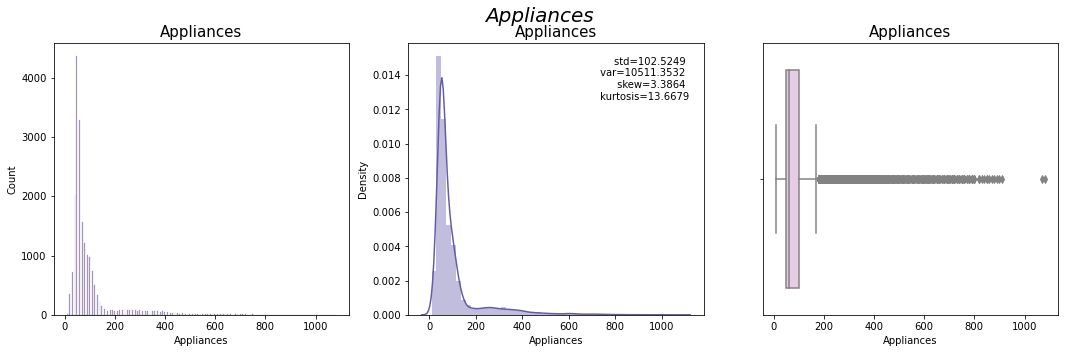

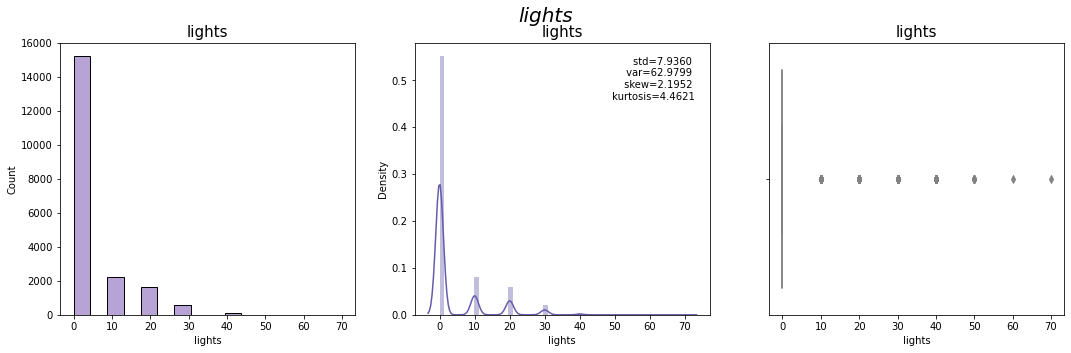

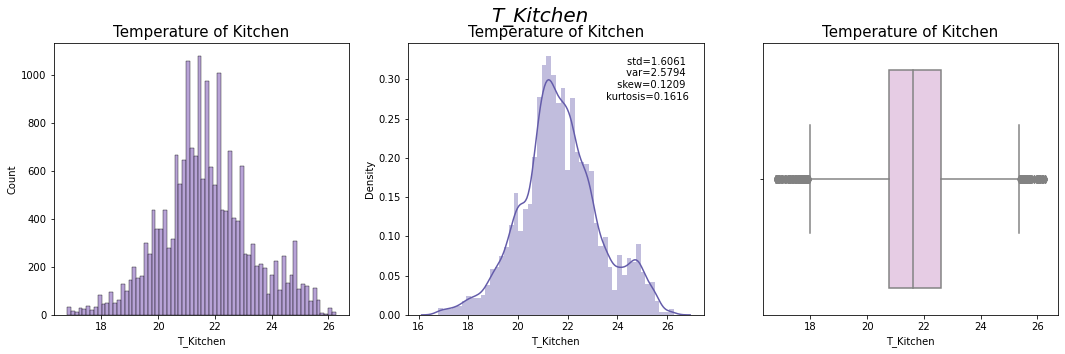

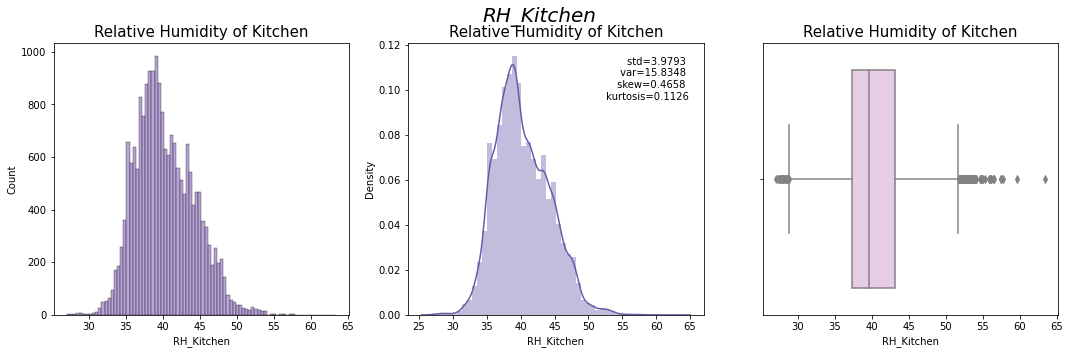

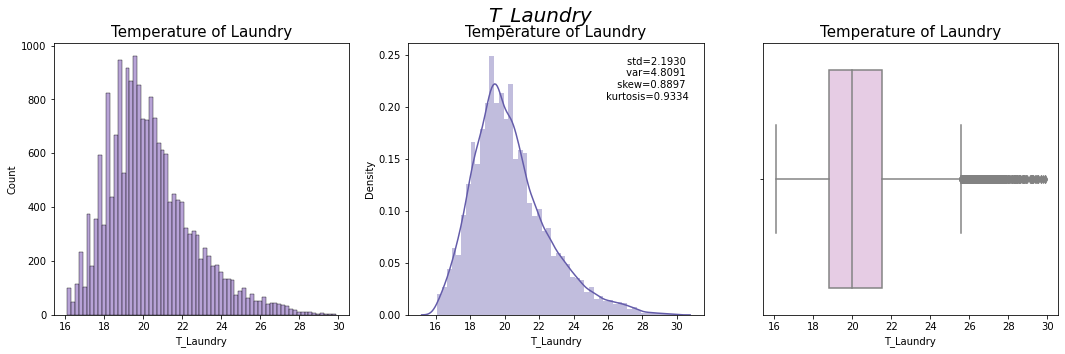

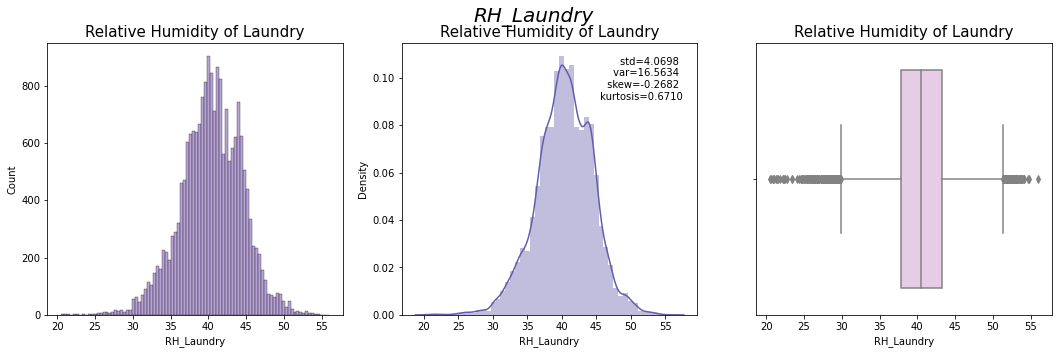

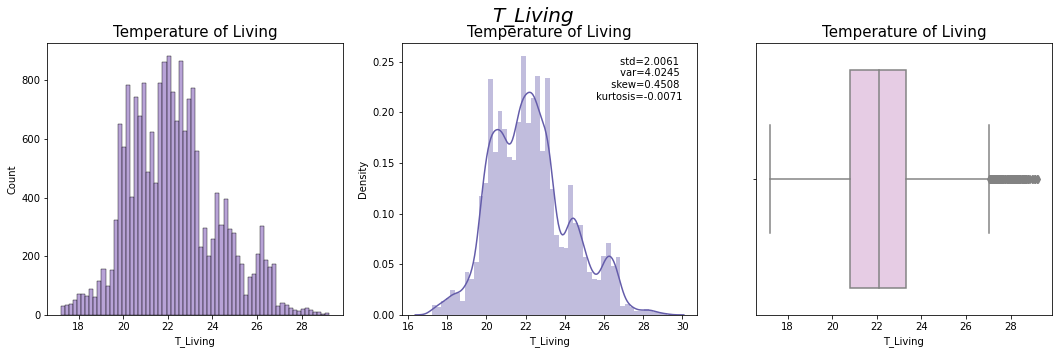

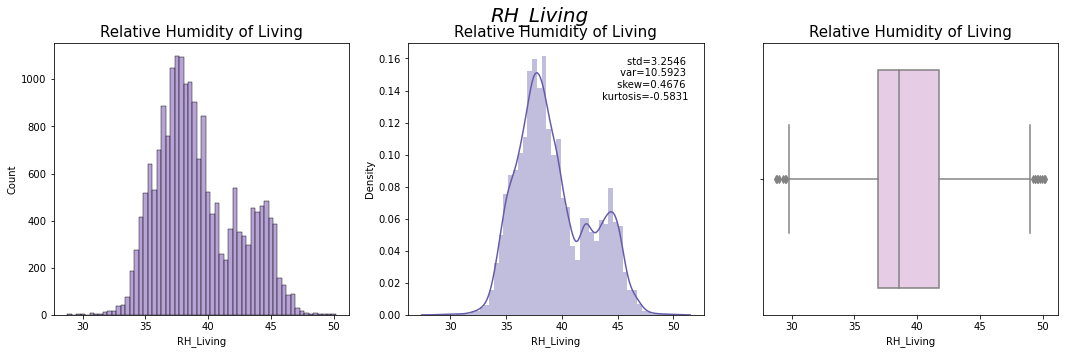

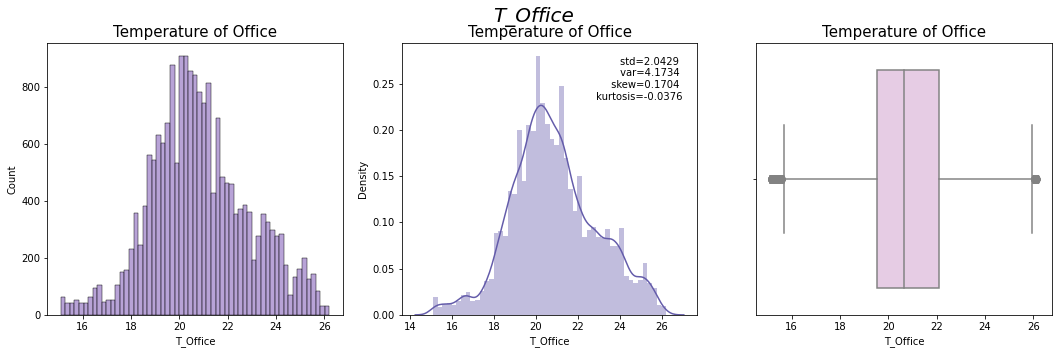

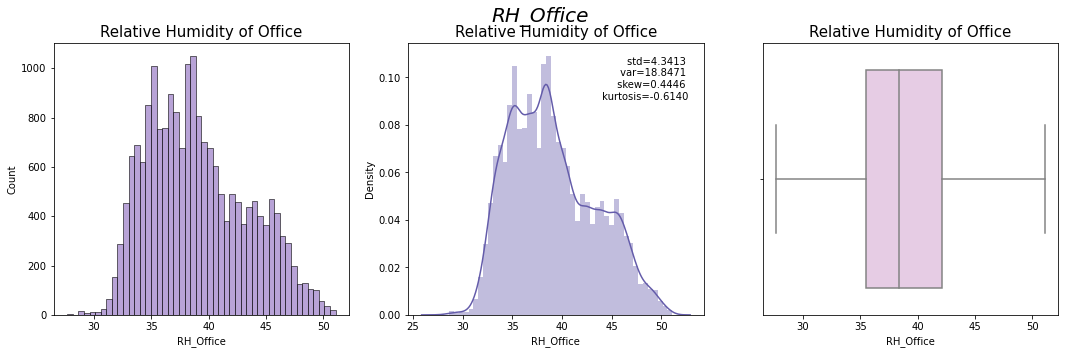

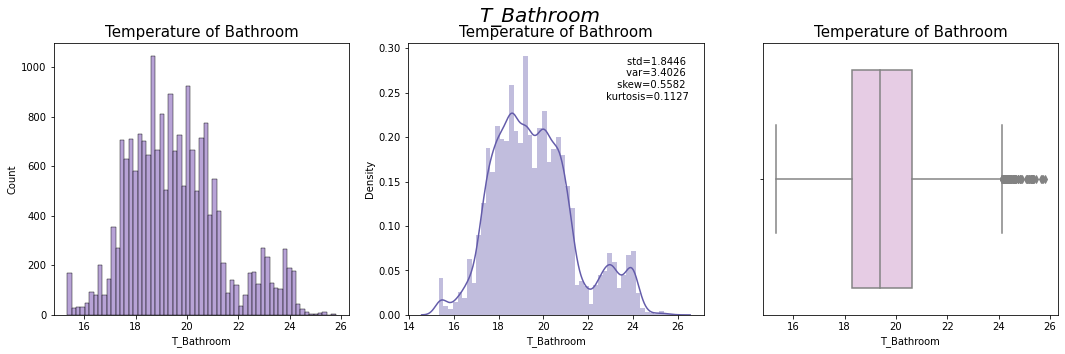

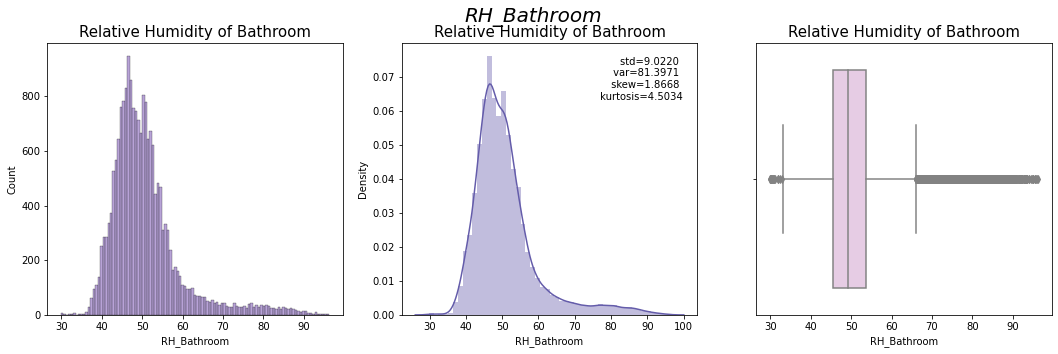

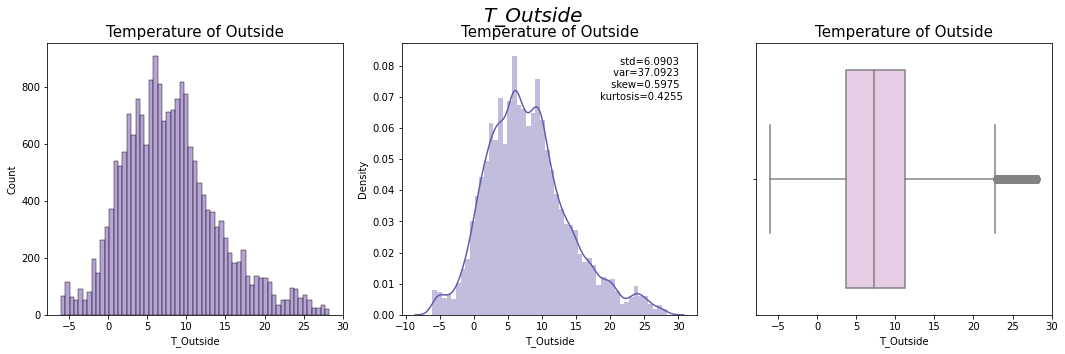

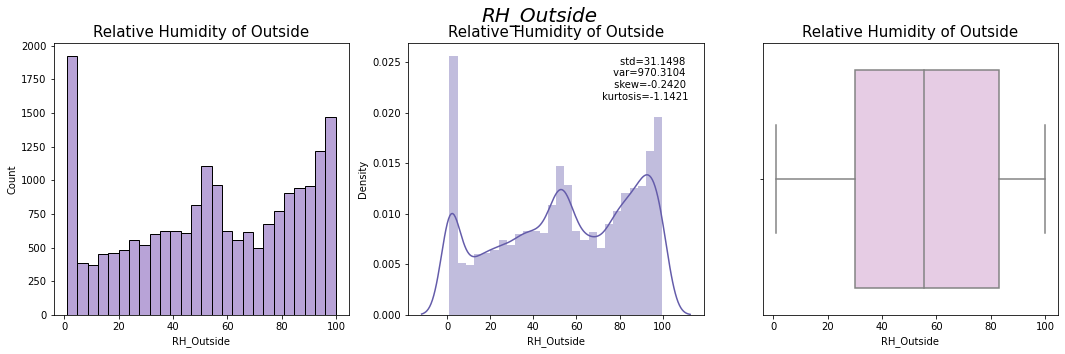

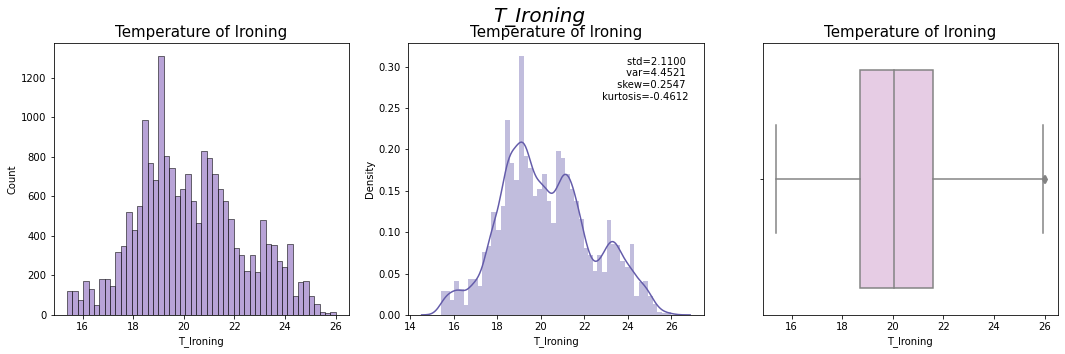

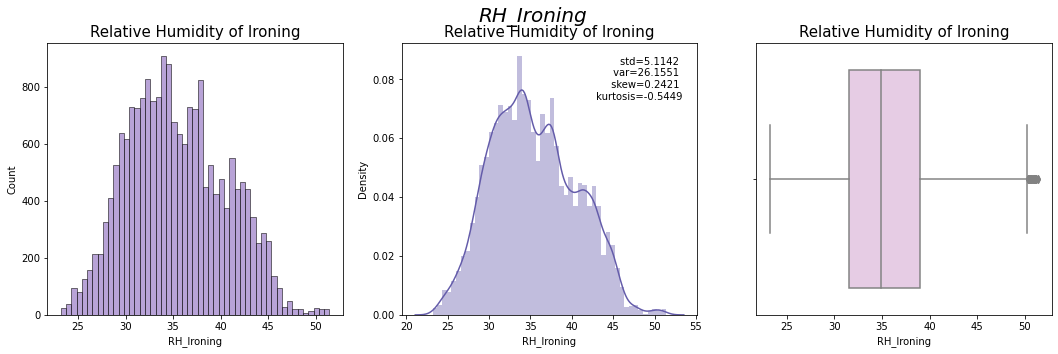

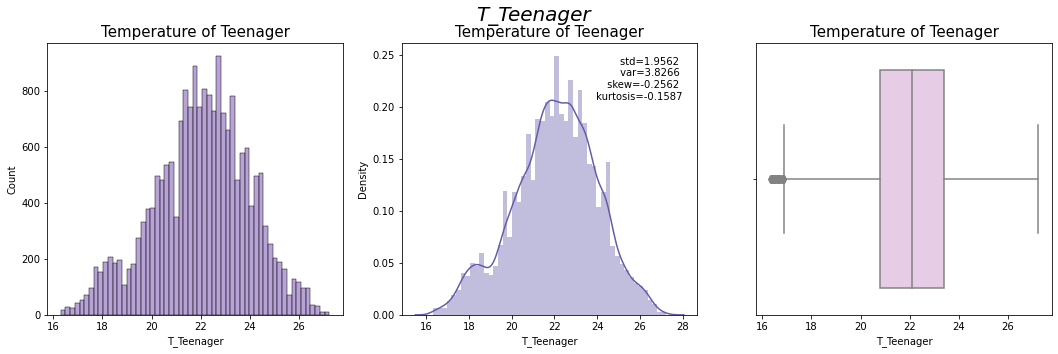

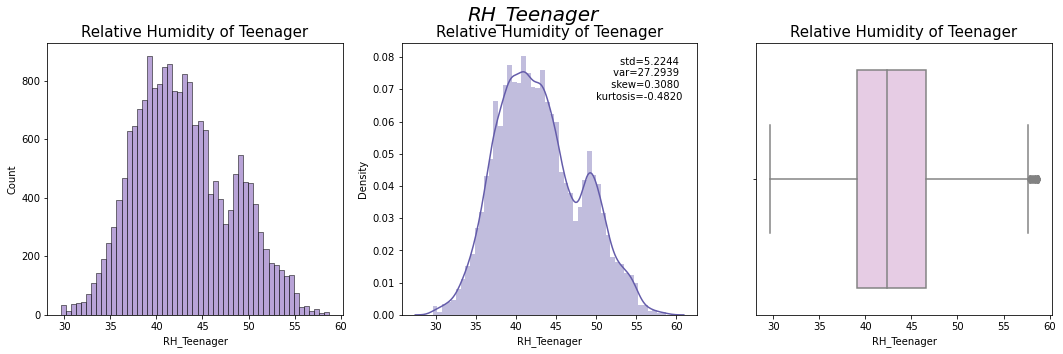

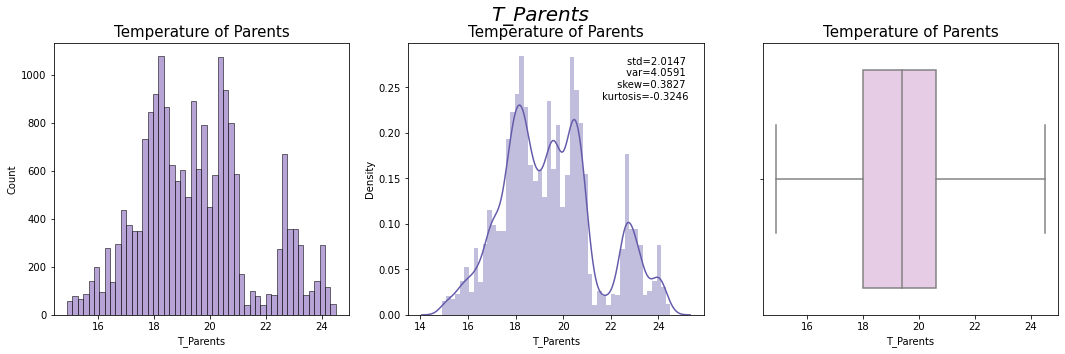

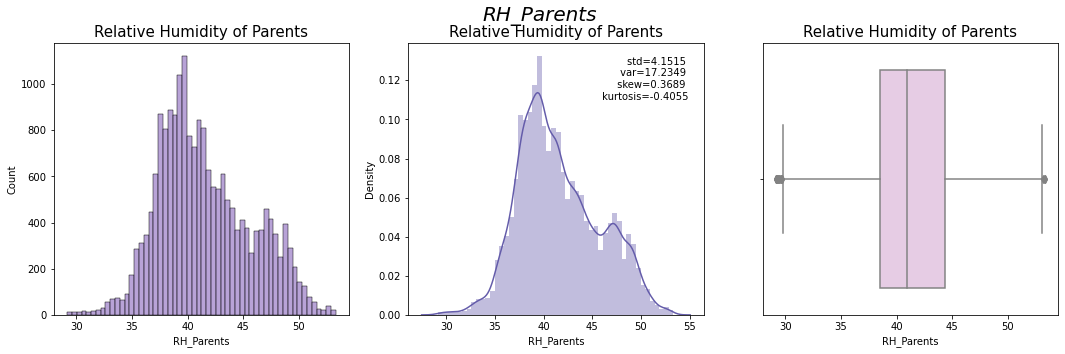

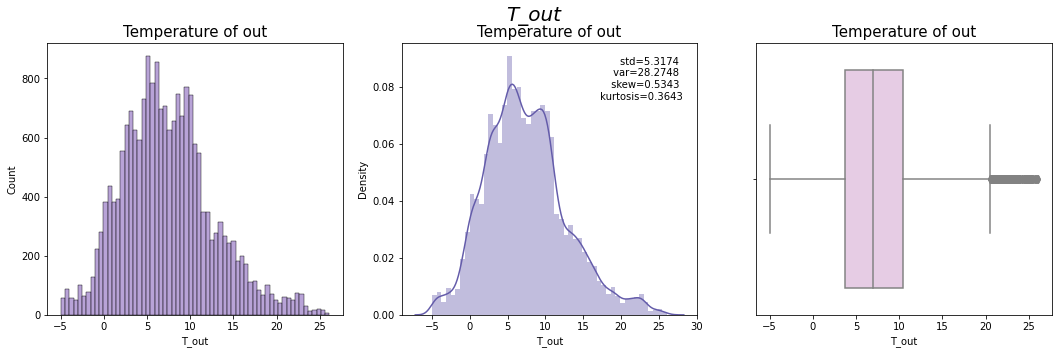

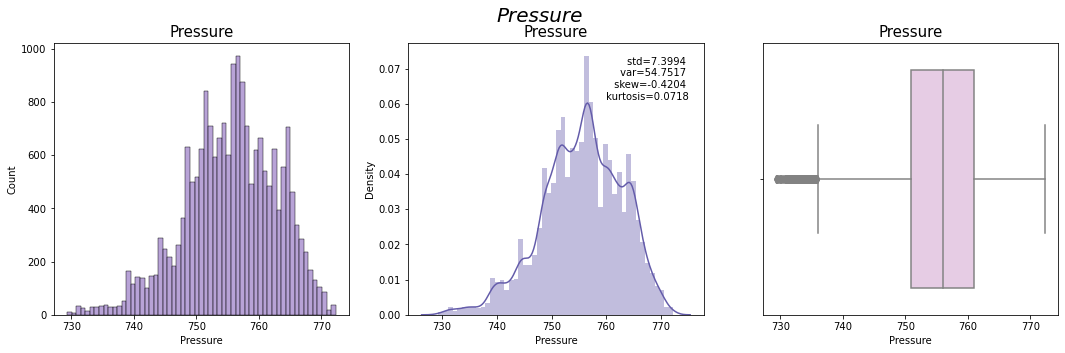

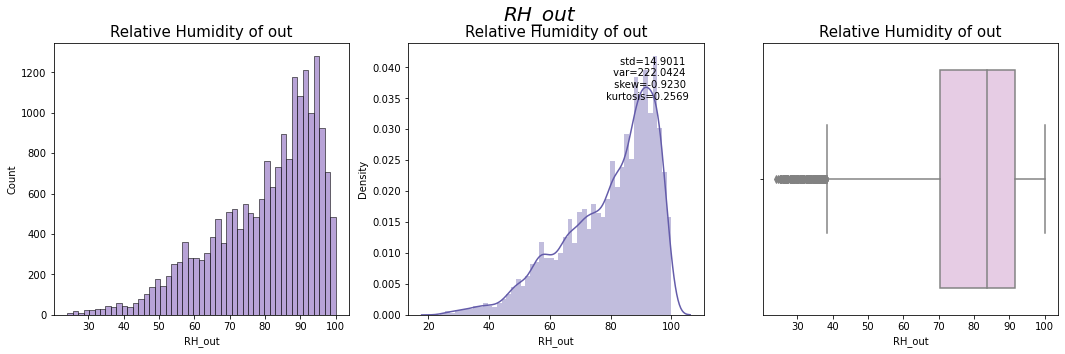

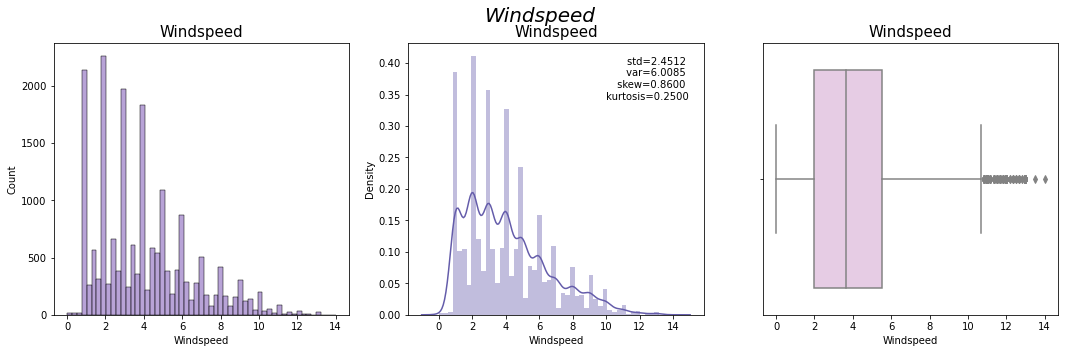

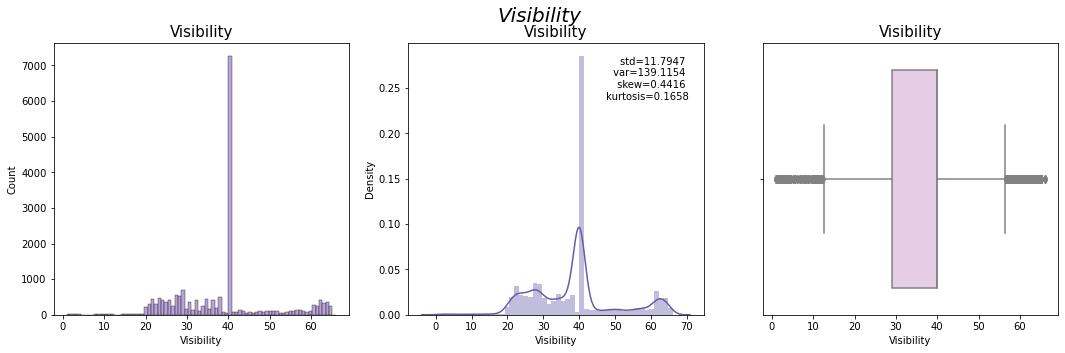

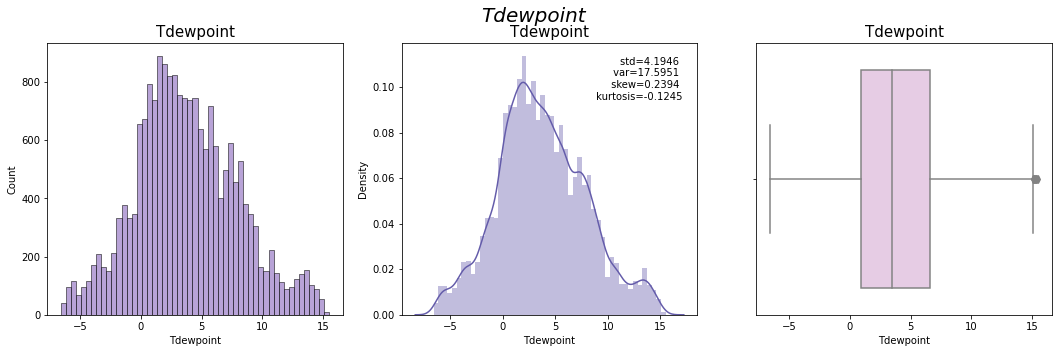

In [13]:
for i in df.iloc[:,1:-2]:
    plot_data(i)

**General Observations:** <br>
- From the temperature plots, we can see the maximum occurence and probability for various factors. <br>
- Distinguish the relevance of plots for continuous and discrete data <br>
- Find the outliers means the exceptions, irregularities and the anomalies in the data and reasoning the cause. <br>
- Observe the likelihood of most occured values for the distribution. <br>

For example, <br>
Let's see the Temperature of kitchen and make a few conclusion from the data: <br>
- We have nearly 5% extension of outliers data from the limits based on Interquartile range. <br>
- We can observe the temperature between 20-22 has the highest probability to lie in the distribution. <br>
- In the similar way, travelling opposite to the above statement, we can also intuit or estimate the likelihood <br>
- There are very few chances (may be approx. less than 5%) to cross the temperature beyond 25-26 and below 18.
- There are fluctuations, but there is no drop for longer lengths in the distributions (check in center distribution)

Similarly, we need to understand the data and make the relevant and useful conclusions for the suitable objective <br>

Though we have got some understanding of the features, we missed something. Lets look at them!! <br>
- We couldn't infer any quantitative data. <br>
- We couldn't frame any cases and reason them. <br>
- We couldn't know the averages, ranks and priorities in the data. <br>
- We couldn't understand the quantitive spread, which means how much it is spread. <br>
- As we dont have the quantitave conclusions, we can neither compare situations nor make predictions. <br>

**What should we do to make a few quantitative inferences? How are they important?** <br>
We need `Statistics` and a few `Statistical tests` for the same which are pre-written or pre-defined in libraries in python. <br>
Lets see!! 


In [14]:
# Descriptive Statistics: 
df.describe()

,Appliances,lights,T_Kitchen,RH_Kitchen,T_Laundry,RH_Laundry,T_Living,RH_Living,T_Office,RH_Office,...,T_Parents,RH_Parents,T_out,Pressure,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [25]:
# More Statistical Findings
def central_tendency(df,col_list):                                            #defining a function to find mean, median and mode to all the columns 
        mean_col, median_col,mode_col = [],[],[]                        #taking three empty columns to add the data
        percentile_90,percentile_95 = [],[]                                    #90%, 95% percentile values
        upper_limit,lower_limit,zscore = [],[],[]                              #Using the 99.97% shuffle to remove outliers
        for col in col_list:                                                             # for loop for processing the data
            ser = df[col]                                                                  #adding column by column to a reference
            mean_col.append(ser.mean())                                      #calculating mean and adding that to mean column
            median_col.append(ser.median())                                #calculating median and adding that to median column
            mode_col.append(ser.mode())                                     ##calculating mode and adding that to mode column
            upper_limit.append(ser.mean() + 3*ser.std())               #calculating upper limit for 3 times the std deviation for each column
            lower_limit.append(ser.mean() - 3*ser.std())                #calculating upper limit for 3 times the std deviation for each column
            percentile_90.append(np.percentile(ser,90))                #percentile 90% for all columns
            percentile_95.append(np.percentile(ser,95))                #percentile 95% for all columns
    
        return mean_col,median_col,mode_col,upper_limit,lower_limit,percentile_90,percentile_95 #return the columns to use it in the next function to plot the data
    
col_list = df.iloc[:,1:].columns                                                                #accessing list of columns
mean_col,median_col,mode_col,upper_limit,lower_limit,percentile_90,percentile_95 = central_tendency(df,col_list) 
df_stats = pd.DataFrame({'columns':col_list,'mean':mean_col,'median':median_col,'upper limit':upper_limit,'lower limit':lower_limit,'90 percentile':percentile_90,'95 percentile':percentile_95})                 #calling the central tendency function
df_stats

,columns,mean,median,upper limit,lower limit,90 percentile,95 percentile
0,Appliances,97.694958,60.000000,405.269630,-209.879713,196.000000,330.000000
1,lights,3.801875,0.000000,27.609838,-20.006088,20.000000,20.000000
2,T_Kitchen,21.686571,21.600000,26.504768,16.868374,23.963333,24.726455
3,RH_Kitchen,40.259739,39.656667,52.197636,28.321843,45.700000,47.326667
4,T_Laundry,20.341219,20.000000,26.920140,13.762299,23.331200,24.557667
5,RH_Laundry,40.420420,40.500000,52.629858,28.210983,45.227333,46.664333
6,T_Living,22.267611,22.100000,28.285943,16.249279,25.100000,26.200000
7,RH_Living,39.242500,38.530000,49.006230,29.478771,44.363333,45.090000
8,T_Office,20.855335,20.666667,26.983988,14.726681,23.790000,24.500000
9,RH_Office,39.026904,38.400000,52.050866,26.002942,45.500000,46.790000


In [15]:
# We can understand the mean, variance, standard deviation, quartiles, maximum and minimum values from the above function. 

### Inferential Statistics:

Inferential Statistics is a method of framing conclusions using statistical methods and patterns. <br>
Example, comparing two categories based on an attribute, comparing weeks of data, days and inferencing traffic density. <br>
There are lot of ways to make these having a sole unique reason for each of these functions or tests. <br>

Let's take above data and perform this: <br>

Before going into the topic, we should have a clarity on continuous or discrete data. <br>
Simultaneously, We should also have an idea of Nominal data and ordinal data. <br> 

Nominal data is discrete type data with no order or ranking where as ordinal data must represent some ordered relation among them. <br>

In [16]:
# Finally,....
# We will see the usage of test, when to use which test and the application on this Energy data. 

In [17]:
## 1. Hypothesis Testing: 
###################################################################################################################
# Hypothesis testing is the method of framing an statement and check if the assumption is true using Statistical tests. 
# In Hypothesis testing, we frame an useful opinion and frame it as null hypothesis
# Null Hypothesis basically contains the equality for the condition in the statement. 
# We frame the statement opposite to it as alternative hypothesis for any other case. 
# We take a confidence value, which means that the no of times per 100, it will fall in the upper and lower bounds. 
# ...If confidence value=0.95, 95 times out of 100, the hypothesis is not rejected. 
# alpha(𝛼) = 0.05 implies that the null hypothesis is rejected 5 % of the time when it is in fact true.
# Assume the test is taken 100 times, It is rejected 5 times when it is true. 

In [18]:
# Errors:
#####################################################################################################################
# We have Type-1 error and Type-2 error here.
# Type-1 error: Rejecting the hypothesis when it is True
# Type-2 error: Fail to reject the Null Hypothesis when it is False

In [19]:
# We use statistical tests, to check for sure if our conclusion is right. 
# They are t-test, z-test, chi-square test, ANOVA etc..,

**Before going to tests, three things we should know for sure:**
1. When to use which test?
2. What are Parametric tests?
3. What are Non-parametric tests? 
 

Lets see one by one!! 

**What are Parametric tests and Non-parametric tests?** <br>
- Parametric tests are those that make assumptions about the parameters of the population distribution from which the sample is drawn. 
- This is often the assumption that the population data are normally distributed. 
- Non-parametric tests are “distribution-free” and, as such, can be used for non-Normal variables

For example, t-test is a parametric test,  equivalent non-parametric test is Wilcoxon test or Mann-Whitney U-test <br>
Similarly, Pearson correlation is parametric, spearman correlation is non-parametric <br>

**When non-parametric tests can be used all the time, why dont we do that?** <br>
1. We are rarely interested in a significance test alone; we would like to say something about the population from which the samples came, and this is best done with estimates of parameters and confidence intervals.

2. It is difficult to do flexible modelling with non-parametric tests, for example allowing for confounding factors using multiple regression.

3. Parametric tests usually have more statistical power than their non-parametric equivalents. In other words, one is more likely to detect significant differences when they truly exist.

In [27]:
df.head()

,date,Appliances,lights,T_Kitchen,RH_Kitchen,T_Laundry,RH_Laundry,T_Living,RH_Living,T_Office,...,T_Parents,RH_Parents,T_out,Pressure,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


- **For the first question above**, <br>
             Null Hypothesis: The mean of Relative Humidity of Kitchen is equal to mean of Relative Humidity in Office.
             Alternate Hypothesis: The averages of Relative Humidity differs by area [Kitchen,Office].

In [29]:
# WE can use averages of the parameters in both the areas 
# Now, the data input is continuous, the output we need is a statistic or the probability to not having difference.
# We shall use t-test. What is t-test?
# A t-test is a statistical test that is used to compare the means of two groups. 
# It is often used in hypothesis testing to determine whether a process or treatment actually has an effect on the 
# ...population of interest, or whether two groups are different from one another.

- A t-test is a parametric test of difference which means that it makes a few assumptions on the population from which the sample is drawn <br>
- **Assumptions :**<br>
        - are independent
        - are Normally distributed approximately.
        - having homogeneity of variance (similar amount of variance)

- **Lets check if the above conditions are satisfied:**
      - It is our primary assumption that temperature of Both the rooms and the station parameters are independent. 
      - From the plot, we can observe the approximate normal distribution
      - We can also see the variance from the describe() function, having similar variance, 4 and 4.3

- **One-tailed or two-tailed t-test?**
      - If you only care whether the two populations are different from one another, perform a two-tailed t-test.
      - If you want to know whether one population mean is greater or less than the other,perform a one-tailed t-test.
      - For example, Ques.3, Your observations come from two separate samples (separate no of appliances), so you perform a two-sample t-test.

#### $ t = \frac{\bar X - \mu}{s/ \sqrt{n}} $ <br> 
{double click on the formuale to view in zoom}

$\mu$ -- Population mean <br>
$\bar X$ -- Sample mean <br>
$n$ -- sample size <br>
$s$ -- standard deviation of sample <br>
$\sigma $ -- standard deviation of population (we are not using here) <br>

In [36]:
# As t-test works for the low sized samples, lets sample the data for a size less than 30.
test_1 = df.sample(n=30, axis=0)

In [37]:
import scipy.stats
scipy.stats.ttest_ind(test_1['RH_Kitchen'],test_1['RH_Office'])
# We have 9.8% probability of null hypothesis coming true, which means 9.79% chance that both the means are not same.

Ttest_indResult(statistic=1.6818245674290278, pvalue=0.0979801884998662)

In [46]:
value = scipy.stats.ttest_ind(test_1['RH_Kitchen'],test_1['RH_Office'])

def print_conclusion(value):
    confidence_value = float(input('Enter the value of confidence_value '))
    alpha = 1-confidence_value
    print(value)
    if value[1]<alpha:
        print('Reject the null hypothesis')
    else:
        print('Fail to reject the null hypothesis')
        
print_conclusion(value)
    
## Lets check for another confidence value:
Y_N = input('Want to check for another confidence value: (Y/N): ')
if Y_N=='Y':
    print_conclusion(value)
else:
    print('Conclusion is done')

Enter the value of confidence_value 0.95
Ttest_indResult(statistic=1.6818245674290278, pvalue=0.0979801884998662)
Fail to reject the null hypothesis
Want to check for another confidence value: (Y/N): Y
Enter the value of confidence_value 0.85
Ttest_indResult(statistic=1.6818245674290278, pvalue=0.0979801884998662)
Reject the null hypothesis


- **For the second question above**, <br>
             Null Hypothesis: The average temperature in the kitchen is same as that of Living room 
             Alternate Hypothesis:  The averages of the temperature differs from that of the living room.

In [47]:
# Here, we try to make a conclusion performing z-test. Generally, we need not sample data. 
# But for now, lets sample 10% of data to reduce computation. 
# Remember when we know the standard deviation of sample, we can proceed with the t-test
# When we know the standard deviation of the population, we can use both based on sample size

In [48]:
# As t-test works for the low sized samples, lets sample the data for a size less than 30.
test_2 = df.sample(n=1900, axis=0)

In [66]:
from statsmodels.stats.weightstats import ztest
ztest(test_2['T_Kitchen'],test_2['T_Living'])
# There is very low prob of the temperatures to be equal in both the areas.

(-9.657654287356682, 4.561896549809673e-22)

In [65]:
value = ztest(test_2['T_Kitchen'],test_2['T_Living'])

def print_conclusion(value):
    confidence_value = float(input('Enter the value of confidence_value '))
    alpha = 1-confidence_value
    print(value)
    if value[1]<alpha:
        print('Reject the null hypothesis')
    else:
        print('Fail to reject the null hypothesis')
        
print_conclusion(value)
    
## Lets check for another confidence value:
Y_N = input('Want to check for another confidence value: (Y/N): ')
if Y_N=='Y':
    print_conclusion(value)
else:
    print('Conclusion is done')

Enter the value of confidence_value 0.95
(-9.657654287356682, 4.561896549809673e-22)
Reject the null hypothesis
Want to check for another confidence value: (Y/N): Y
Enter the value of confidence_value 0.9
(-9.657654287356682, 4.561896549809673e-22)
Reject the null hypothesis


- **For the third question above**, <br>
             Null Hypothesis: Avg temperature of living room is same with change in appliances
             Alternate Hypothesis : Avg temperature differs with change in no of appliances.

In [69]:
df['Appliances'].value_counts()

50      4368
60      3282
40      2019
70      1560
80      1205
        ... 
890        1
1070       1
910        1
1080       1
840        1
Name: Appliances, Length: 92, dtype: int64

In [81]:
df_new = df[df['Appliances']<=90]
df_new = df_new[df_new['Appliances']>10]

In [82]:
df_new['Appliances'].value_counts()

50    4368
60    3282
40    2019
70    1560
80    1205
90    1015
30     723
20     343
Name: Appliances, dtype: int64

In [84]:
# We shall consider eight categories; they contribute 75% of data
# Lets sample the data grouping them by no of appliances
# For this multiple groups, we perform ANOVA(Analysis of Variance) test
# An ANOVA test is a type of statistical test used to determine if there is a statistically significant difference 
# ...between two or more categorical groups by testing for differences of means using variance.

In [85]:
# A one-way ANOVA (analysis of variance) has one categorical independent variable (also known as a factor) 
# ...and a normally distributed continuous (i.e., interval or ratio level) dependent variable.

In [89]:
df_60 = df[df['Appliances']==60]['T_Living']
df_50 = df[df['Appliances']==50]['T_Living']
df_40 = df[df['Appliances']==40]['T_Living']
df_30 = df[df['Appliances']==30]['T_Living']
df_20 = df[df['Appliances']==20]['T_Living']
df_70 = df[df['Appliances']==70]['T_Living']
df_80 = df[df['Appliances']==80]['T_Living']
df_90 = df[df['Appliances']==90]['T_Living']
from scipy.stats import f_oneway
f_oneway(df_90,df_80,df_70,df_60,df_50,df_40,df_30,df_20)

# There is no chance for the temperature to be same when there is change in active appliances

F_onewayResult(statistic=241.41487327824035, pvalue=0.0)

In [90]:
value = f_oneway(df_90,df_80,df_70,df_60,df_50,df_40,df_30,df_20)

def print_conclusion(value):
    confidence_value = float(input('Enter the value of confidence_value '))
    alpha = 1-confidence_value
    print(value)
    if value[1]<alpha:
        print('Reject the null hypothesis')
    else:
        print('Fail to reject the null hypothesis')
        
print_conclusion(value)
    
## Lets check for another confidence value:
Y_N = input('Want to check for another confidence value: (Y/N): ')
if Y_N=='Y':
    print_conclusion(value)
else:
    print('Conclusion is done')

Enter the value of confidence_value 0.95
F_onewayResult(statistic=241.41487327824035, pvalue=0.0)
Reject the null hypothesis
Want to check for another confidence value: (Y/N): Y
Enter the value of confidence_value 0.05
F_onewayResult(statistic=241.41487327824035, pvalue=0.0)
Reject the null hypothesis


- **For the fourth question above**, <br>
             Null Hypothesis: Pressure is highly correlated with the speed
             Alternate Hypothesis : Pressure is independent of speed.

In [92]:
# For this question, to check the relation and direction of change, we  use correlations.
# correlation or dependence is any statistical relationship between two random variables or bivariate data.
# Here's the formulae for Pearson's correlation

$\rho = \frac{\text{cov}(X,Y)}{\sigma_x \sigma_y} $ <br>

where covariance is <br>
${cov}(X,Y) = \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})$

$r = \frac{{}\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})}
{\sqrt{\sum_{i=1}^{n} (x_i - \overline{x})^2(y_i - \overline{y})^2}} $ <br>

where <br>
$ \sigma_x $ = Standard deviation of X <br>
$ \sigma_y $ = Standard deviation of Y <br>

In [93]:
# Spearman correlation
# The Spearman correlation coefficient (rho) measures the relationship between two variables. 
# Spearman's rho can be understood as a rank-based version of Pearson's correlation coefficient, 
# ...which can be used for variables that are not normal-distributed and have a non-linear relationship. 
# Also, its use is not only restricted to continuous data, but can also be used in analyses of ordinal attributes.

$ \rho = 1- {\frac {6 \sum d_i^2}{n(n^2 - 1)}} $ <br>

where <br>
d = the pairwise distances of the ranks of the variables xi and yi. <br>
n = the number of samples. <br>

In [99]:
df1 = df[['Pressure','Windspeed']]
df1.corr(method='pearson')
## For 100% rise in pressure, windspeed decreases for 23% (negative sign indicates the opposite direction of change)

,Pressure,Windspeed
Pressure,1.000000,-0.235032
Windspeed,-0.235032,1.000000


In [100]:
df1 = df[['Pressure','Windspeed']]
df1.corr(method='spearman') ## Spearman correlation

,Pressure,Windspeed
Pressure,1.000000,-0.212702
Windspeed,-0.212702,1.000000


In [101]:
df1 = df[['Pressure','Windspeed']]
df1.corr(method='kendall') # Kendall-tau correlation

,Pressure,Windspeed
Pressure,1.000000,-0.144635
Windspeed,-0.144635,1.000000


In [102]:
## Finally, we can make the same conclusions using different correlation methods. 

### Few more tests <br>
Lets see few more tests out of this dataframe <br>

- chi-square test
- Mann- Whitney test, with a tie correction
- Fischer test
- Covid-Remdesivir tests- Multi-arm bandits
- Mood's median test
- Kruskal-Wallis test
- Likelihood ratio tests

### Shapiro-Wilk test

In [104]:
# Shapiro-Wilk test is to check for normality
# The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.

In [103]:
from scipy import stats
shapiro_test = stats.shapiro(df['T_Bathroom'])
shapiro_test
# there is no chance that the taken parameter undergoes normal distribution

ShapiroResult(statistic=0.9709565043449402, pvalue=0.0)

In [105]:
value = stats.shapiro(df['T_Bathroom'])
def print_conclusion(value):
    confidence_value = float(input('Enter the value of confidence_value '))
    alpha = 1-confidence_value
    print(value)
    if value[1]<alpha:
        print('Reject the null hypothesis')
    else:
        print('Fail to reject the null hypothesis')
        
print_conclusion(value)
    
## Lets check for another confidence value:
Y_N = input('Want to check for another confidence value: (Y/N): ')
if Y_N=='Y':
    print_conclusion(value)
else:
    print('Conclusion is done')

Enter the value of confidence_value 0.6
ShapiroResult(statistic=0.9709565043449402, pvalue=0.0)
Reject the null hypothesis
Want to check for another confidence value: (Y/N): N
Conclusion is done


### Anderson-darling test

In [107]:
# Anderson-darling tests are for checking data from a particular distribution
# The Anderson-Darling test tests the null hypothesis that a sample is drawn from a population that follows a particular distribution.
# For the Anderson-Darling test, the critical values depend on which distribution is being tested against. 
# This function works for normal, exponential, logistic distributions.
# This returns different set of critical values depending upon the set of significance levels

In [108]:
stats.anderson(df['Pressure'], dist='norm')

AndersonResult(statistic=43.57696294012567, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

### Kolmogorov-skirmov test (kstest)

In [109]:
# Kolmogorov-Smirnov test for goodness of fit.
# The one-sample test compares the underlying distribution of a sample against a given distribution. 
# The two-sample test compares the underlying distributions of two independent samples. 
# Both tests are valid only for continuous distributions.

In [111]:
stats.kstest(df_60,stats.norm.cdf)

KstestResult(statistic=1.0, pvalue=0.0)

In [112]:
stats.kstest(df_70, "norm", alternative='less')

KstestResult(statistic=1.0, pvalue=0.0)

In [113]:
stats.kstest(df_60,df_70)
# 0.25% probability that they are from same distribution

KstestResult(statistic=0.055913373646463226, pvalue=0.0025603126928015404)

In [116]:
rng = np.random.default_rng() # Random generator
sample1 = stats.laplace.rvs(size=105, random_state=rng) #Random variables with Laplace transform
sample2 = stats.laplace.rvs(size=95, random_state=rng)
stats.kstest(sample1, sample2)

KstestResult(statistic=0.10526315789473684, pvalue=0.5903738974728667)

### Levene's test

In [117]:
# The Levene test tests the null hypothesis that all input samples are from populations with equal variances.

In [119]:
from scipy import stats
stats.levene(df_60,df_70,df_80)
# 31% chance that they have a population of similar variance

LeveneResult(statistic=1.1426199863754616, pvalue=0.31905109131604437)

### Mann-Whitney test

In [ ]:
# Perform the Mann-Whitney U rank test on two independent samples.

# The Mann-Whitney U test is a nonparametric test of the null hypothesis that 
# ...the distribution underlying sample x is the same as the distribution underlying sample y. 
# It is often used as a test of difference in location between distributions.
# It assigns the rank for the higher score

$ U_1 = n_{1}n_{2} +\frac{n_{1}\left ( n_{1}+1 \right )}{2} - R_{1} $ <br>
$ U_2 = n_{1}n_{2} +\frac{n_{2}\left ( n_{2}+1 \right )}{2} - R_{2} $



In [ ]:
# df_60 = df[df['Appliances']==60]['T_Living']
# df_50 = df[df['Appliances']==50]['T_Living']

In [121]:
from scipy.stats import mannwhitneyu
U1, p = mannwhitneyu(df_60,df_50)
print(U1) # Statistic assosciated with the first sample

8366026.5


In [123]:
nx, ny = len(df_60), len(df_50)
U2 = nx*ny - U1
print(U2) # Statistic assosciated with the second sample

5969749.5


In [124]:
print(p) # probability that they came from the same distribution

4.912035368712515e-36


### Chisquare test

In [125]:
# Chisquare test works for two or more categorical variables.